In [8]:
import json
import matplotlib.pyplot as plt
from Football_Pitch import draw_football_pitch
import textwrap

%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

In [9]:
match_id = 69160

fin = open("../Data/Statsbomb_Data/events/" + str(match_id) + ".json", "r")
data = json.load(fin)
fin.close()

print("Example event: ")
data[4]

Example event: 


{'id': 'f1bf22f3-5e7a-465e-bcb2-b8ff9eadcec7',
 'index': 5,
 'period': 1,
 'timestamp': '00:00:00.463',
 'minute': 0,
 'second': 0,
 'type': {'id': 30, 'name': 'Pass'},
 'possession': 2,
 'possession_team': {'id': 217, 'name': 'Barcelona'},
 'play_pattern': {'id': 9, 'name': 'From Kick Off'},
 'team': {'id': 217, 'name': 'Barcelona'},
 'player': {'id': 19298, 'name': 'Samuel Eto"o Fils'},
 'position': {'id': 23, 'name': 'Center Forward'},
 'location': [60.0, 40.0],
 'duration': 0.5778,
 'related_events': ['0a4f7331-8d1d-4417-b24c-70de75f87a07'],
 'pass': {'recipient': {'id': 25879, 'name': 'Ronaldo de Assis Moreira'},
  'length': 1.3152946,
  'angle': 1.7234457,
  'height': {'id': 1, 'name': 'Ground Pass'},
  'end_location': [59.8, 41.3],
  'body_part': {'id': 40, 'name': 'Right Foot'},
  'type': {'id': 65, 'name': 'Kick Off'}}}

In [10]:
teams = [data[1]["possession_team"]["name"], data[1]["team"]["name"]]
shots = []

for event in data:
    if "shot" in event:
        if event["shot"]["outcome"]["name"] == "Goal":
            shots.append(
                [
                    event["location"],
                    event["shot"]["statsbomb_xg"],
                    event["team"]["name"],
                    True,
                ]
            )
        else:
            shots.append(
                [
                    event["location"],
                    event["shot"]["statsbomb_xg"],
                    event["team"]["name"],
                    False,
                ]
            )

print("There are", len(shots), "shots. Example shot:")
shots[1]

There are 22 shots. Example shot:


[[89.7, 28.6], 0.016984092, 'Real Sociedad', False]

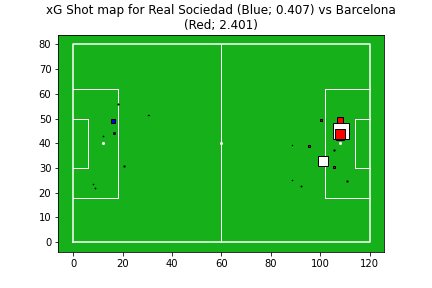

In [11]:
l, w = 120, 80

team_0_xG = 0
team_1_xG = 0

fig, ax = plt.subplots()

draw_football_pitch(fig, ax, l, w)

for position, xG, team, is_goal in shots:
    if team == teams[0]:
        marker = "bs"
        position = [
            l - position[0],
            w - position[1],
        ]  # reflect about the center spot to adjust for perspective
        team_0_xG += xG
    else:
        marker = "rs"
        team_1_xG += xG
    if is_goal:
        marker = "ws"

    ax.plot(*position, marker, ms=xG * 25, markeredgecolor="black")

team_0_xG, team_1_xG = round(team_0_xG, 3), round(team_1_xG, 3)
plt.axis("scaled")
title = (
    "xG Shot map for "
    + teams[0]
    + " (Blue; "
    + str(team_0_xG)
    + ") vs "
    + teams[1]
    + " (Red; "
    + str(team_1_xG)
    + ")"
)
plt.title(textwrap.fill(title, 60))
plt.show()